# 更多Python的一些操作
## 你将会学到:
1. matplotlib画简单的图
2. 简单的读取，写入数据文件

## 基本的画图

这里我们简单讲一下最基本的画图，后面再讲数据科学的时候，我们再讲一些别的画图方法。


In [2]:
# 首先我们还是导入需要的库
# 我们就先用最基本的matplotlib.pyplot
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt
import math
print('---------')


---------


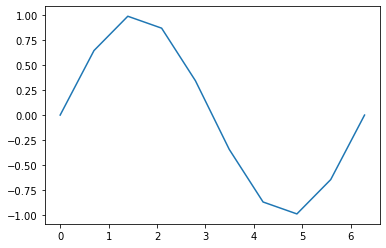

In [3]:

# 画一个简单波形，给x，y就可以了
x = np.linspace(0, 2*math.pi, 10)
y = np.sin(x)
plt.plot(x, y)
plt.show()

In [4]:
y

array([ 0.00000000e+00,  6.42787610e-01,  9.84807753e-01,  8.66025404e-01,
        3.42020143e-01, -3.42020143e-01, -8.66025404e-01, -9.84807753e-01,
       -6.42787610e-01, -2.44929360e-16])

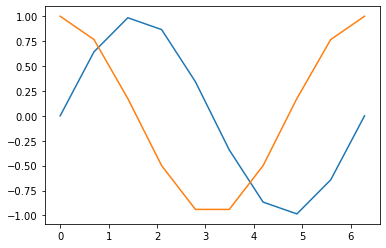

In [5]:
# 如果你连续调用过次，一个图中就会被画上多个曲线，自动变成不同的颜色

y2 = np.sin(x+math.pi/2)
plt.plot(x, y)
plt.plot(x, y2)



## 图中的一些重要的元素

1. 首先就是x，y，就是两个轴
2. alphas是图的不透明度，1完全不能不透明，0完全透明
3. label是这条曲线的表签，会显示在legend里面
4. color是现得颜色，
5. linestyle是现得类型，比如是不是虚线什么的，linewidth是线的宽度
6. marker是数据点的标志，markersize, markerfacecolor，markeredgecolor是控制marker的，不用我解释了吧
7. ylim，xlim就是数据轴的限制，一般是自动的，但是你也可以控制只显示图的一部分
8. title是这个图的标签，grid时显示网格,xlabel,ylabel是坐标轴的标签
9. legend()函数是给图添加上标签


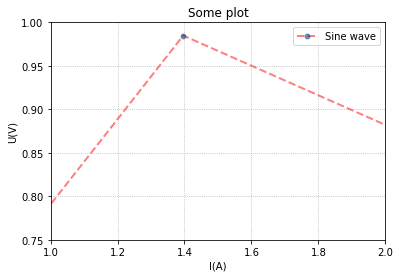

In [6]:
# element of a plot
plt.plot(x, y, alpha=0.5, label='Sine wave',
         color='red', linestyle='dashed', linewidth=2,
         marker='o', markersize=5, markerfacecolor='blue',
         markeredgecolor='green')
plt.ylim([0.75, 1])
plt.xlim([1, 2])
plt.title('Some plot')
plt.xlabel('I(A)')
plt.ylabel('U(V)')
plt.grid(True, linestyle=':')
plt.legend()


下面的表格是上面提到的一些元素可以取得值供大家参考。

| character | description           | character | description         |
|-----------|-----------------------|-----------|---------------------|
| -         | solid line style      | 3         | tri_left marker     |
| --        | dashed line style     | 4         | tri_right marker    |
| -.        | dash-dot line style   | s         | square marker       |
| :         | dotted line style     | p         | pentagon marker     |
| .         | point marker          | *         | star marker         |
| ,         | pixel marker          | h         | hexagon1 marker     |
| o         | circle marker         | H         | hexagon2 marker     |
| v         | triangle_down marker  | +         | plus marker         |
| ^         | triangle_up marker    | x         | x marker            |
| <         | triangle_left marker  | D         | diamond marker      |
| >         | triangle_right marker | d         | thin_diamond marker |
| 1         | tri_down marker       | |         | vline marker        |
| 2         | tri_up marker         | _         | hline marker        |

| character | color   |
|-----------|---------|
| b         | blue    |
| g         | green   |
| r         | red     |
| c         | cyan    |
| m         | magenta |
| y         | yellow  |
| k         | black   |
| w         | white   |

| Character | Line Style          |
|-----------|---------------------|
| -         | solid line style    |
| --        | dashed line style   |
| -.        | dash-dot line style |
| :         | dotted line style   |

## 你可以画很多有趣的东西
plot the heart shape:

$$x=16sin^3(t)$$
$$
y=13cos(t)-5cos(2t)-2cos(3t)-cos(4t)
$$

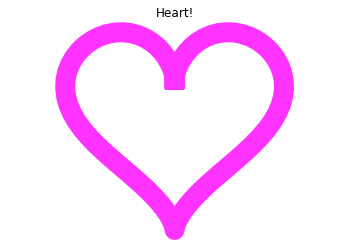

In [7]:

# just for fun

t = np.linspace(0, 2*np.pi, 100)

x3 = 16*np.sin(t)**3
y3 = 13*np.cos(t) - 5*np.cos(2*t) - 2*np.cos(3*t) - np.cos(4*t)

# Plot line with RGB tuple (red=1, green=0.2, blue=0.5)
# and 20pt line width
plt.plot(x3, y3, c=(1, 0.2, 1), lw=20)

# Add features to our figure
plt.title('Heart!')
plt.axis('equal')
plt.axis('off')
# 我这里用的是notebook inline的画图，所以不需要show，你们自己写程序，很多时候要让图片显示出来是要用show的
plt.show()

## sub plot

你可以在一张画布上画多个图，就是有多个坐标系。只要使用subplot就可以了，
subplot的参数分别表示子图的行列，后面一个是选择那个子图，按照从左到右从上到下的顺序编号。

Text(0.5, 1.0, 'Cosine')

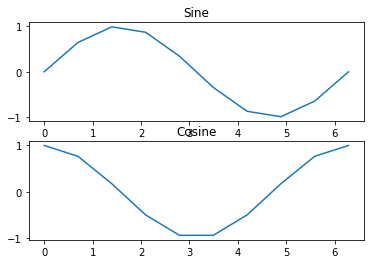

In [8]:

plt.figure()
plt.subplot(2, 1, 1)
plt.plot(x, y)
plt.title('Sine')
plt.subplot(2, 1, 2)
plt.plot(x, y2)
plt.title('Cosine')


## 散点图

除了plot曲线，还有个类似而且很重要的图就是散点图，scatter。

他和plot很像，就是点点之间没有用线连起来。下面这个散点图，分别创建了两个2维德高斯分布，他们的均值不同，
可以看到画图的时候可以根据额数据，选在用不同的颜色，或者用不同的大小。

D:\Anaconda3\lib\site-packages\matplotlib\collections.py:922: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


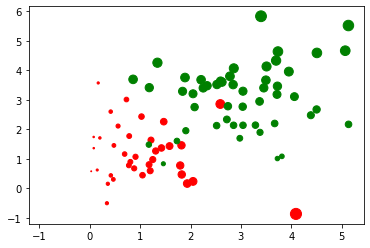

In [11]:
# scatter plot
dots1 = np.random.multivariate_normal((1, 1), ((1, 0), (0, 1)), 50)
dots2 = np.random.multivariate_normal((3, 3), ((1, 0), (0, 1)), 50)
plt.scatter(dots1[:, 0], dots1[:, 1], c='r', s=dots1[:, 0]*30)
plt.scatter(dots2[:, 0], dots2[:, 1], c='g', s=dots2[:, 1]*20)


## 3D surface图

我们也可以画出3d图，比如来表现一个3维空间中的函数。这个有点麻烦的是，需要`from mpl_toolkits.mplot3d import Axes3D`。
然后我们可以用面向对象的方式来生成一个坐标系对象，然后就可以画图了。这里有很多图的元素和2d的没啥区别，大家可以看看文档：
https://matplotlib.org/stable/tutorials/toolkits/mplot3d.html#toolkit-mplot3d-tutorial

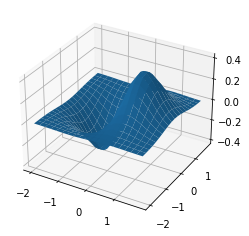

In [12]:
# 首先我们先import Axes3D
# from mpl_toolkits.mplot3d import Axes3D
x = np.array(np.arange(-2, 2, 0.2))
x = x.reshape(1, x.shape[0])
y = x.T
z = x * np.exp(-x ** 2 - y ** 2)
py, px = np.gradient(z)

X, Y = np.meshgrid(x, y)
# # 这里用了面向对象的方法，我们先通过fig.gca拿到一个坐标系的object，然后在操作他，这个方法其实更好，
# 可读性更强，推荐使用这种方法
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, z)


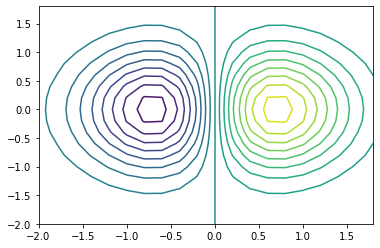

In [16]:
# 你也可以话等高线，上节课讲过，这里可以指定levels来指定花多少个级别。
plt.contour(X, Y, z, levels=20)  # 绘制等高线


## 坐标轴不一定要是线性的

下面分别展示了线性坐标轴，对数坐标轴，对阵对数坐标轴（我不知道干啥用的），还有logit坐标轴的用法。

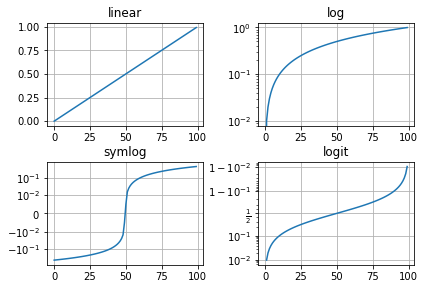

In [19]:
# make up some data in the open interval (0, 1)
x = np.arange(0, 100, 1)
y = x/100

# plot with various axes scales
plt.figure()

# linear
plt.subplot(221)
plt.plot(x, y)
plt.yscale('linear')
plt.title('linear')
plt.grid(True)

# log
plt.subplot(222)
plt.plot(x, y)
plt.yscale('log')
plt.title('log')
plt.grid(True)

# symmetric log
plt.subplot(223)
plt.plot(x, y - y.mean())

plt.yscale('symlog', linthresh=0.01)
plt.title('symlog')
plt.grid(True)

# logit
plt.subplot(224)
plt.plot(x, y)
plt.yscale('logit')
plt.title('logit')
plt.grid(True)
# 有点挤，巴图分开一点
plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.35,
                    wspace=0.35)


## 极坐标

你也可以用极坐标画图，用法和x，y笛卡尔坐标系一样。

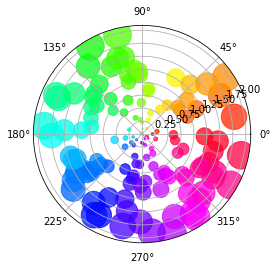

In [12]:
# polar axis
N = 150
r = 2 * np.random.rand(N)
theta = 2 * np.pi * np.random.rand(N)
area = 200 * r**2
colors = theta
# 这里用了面向对象的方法，我们先通过subplot拿到一个坐标系的object，然后在操作他，这个方法其实更好，
# 可读性更强，推荐使用这种方法
ax = plt.subplot(111, projection='polar')
ax.scatter(theta, r, c=colors, s=area, cmap='hsv', alpha=0.75)
# ax.set_thetamin(45)
# ax.set_thetamax(135)


## 练习
一个小球，在地球上水平抛出，初始高度为h，速度为v，落地后弹起时，
垂直速度为原来的0.7水平速度不变，请画出他在第二次落地前的轨迹

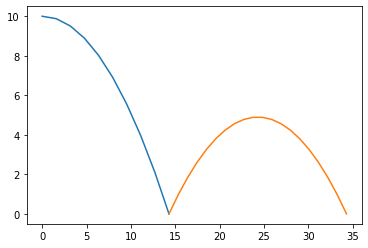

In [3]:


def ball(h, v):
    g = 9.8
    fallTime = (2*h/g)**0.5
    x1 = np.linspace(0, v*fallTime, 10)
    yTime = x1/v
    y1 = h-0.5*g*yTime**2
    fallTime2 = fallTime*0.7*2
    v2 = fallTime*0.7*g
    x2 = np.linspace(0, v*fallTime2, 20)
    yTime2 = x2/v
    x2 += v*fallTime
    y2 = yTime2*v2-0.5*g*yTime2**2
    plt.plot(x1, y1)
    plt.plot(x2, y2)


ball(10, 10)


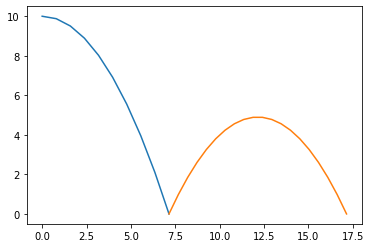

In [11]:
def my_ball(h,v):
    g=9.8
    fall_time=(2*h/g)**0.5
    x1 = np.linspace(0,fall_time*v,10)
    t1 = x1/v
    y1 = h-0.5*g*t1**2

    v2 = fall_time*g*0.7
    fall_time2 = v2/g*2
    x2 = np.linspace(0,v*fall_time2,20)
    t2 = x2/v
    y2 = v2*t2-0.5*g*t2**2
    x2 += v*fall_time

    plt.plot(x1,y1)
    plt.plot(x2,y2)
my_ball(10,5)